In [26]:
import sys

for a in ['', '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python37.zip',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/lib-dynload',
          '/Users/kristjan.roosild/.local/lib/python3.7/site-packages',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages',
          '/Users/kristjan.roosild/projects/donkeycar',
          '/Users/kristjan.roosild/opt/miniconda3/envs/donkey/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg']:
    sys.path.append(a)

In [27]:

import numpy as np
import donkeycar as dk

In [28]:
cfg = dk.load_config(config_path='/Users/kristjan.roosild/mycar/config.py')

loading config file: /Users/kristjan.roosild/mycar/config.py
loading personal config over-rides from myconfig.py


In [93]:
import os

from donkeycar.pipeline.types import TubDataset

def load_tub_angles(tub_path, cfg):
    dataset = TubDataset(cfg, [os.path.expanduser(tub_path)])
    angles = []
    for tub in dataset.tubs:
        for underlying in tub:
            angle = underlying['user/angle']
            angles.append(angle)
    return angles

tubs = [
    '1-1-CC-80',
    '1-2-CC-90',
    '1-3-CC-85',
    '2-1-CW-80',
    '2-2-CW-90',
    '2-3-CW-85',
    '3-2-CW-90',
    '3-3-CW-85',
    '4-1-CC-80',
    '4-2-CC-90',
    '4-3-CC-85'
]
tub_angles = {}

for tub_path in tubs:
    full_path = '/Users/kristjan.roosild/OneDrive/kool/maka/data/' + tub_path
    angles = load_tub_angles(full_path, cfg)
    tub_angles[tub_path] = angles


Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/1-1-CC-80/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/1-2-CC-90/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/1-3-CC-85/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/2-1-CW-80/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/2-2-CW-90/catalog_2.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/2-3-CW-85/catalog_6.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/3-2-CW-90/catalog_6.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/3-3-CW-85/catalog_4.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/4-1-CC-80/catalog_5.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/4-2-CC-90/catalog_7.catalog
Using catalog /Users/kristjan.roosild/OneDrive/kool/maka/data/4-3-CC-85/catalog_4.catalog


In [94]:
from collections import defaultdict
dir_speed_counts = defaultdict(int)
for k, v in tub_angles.items():
    dir_speed_counts[k[-5:]] += len(v)


dir_speed_counts = list(dir_speed_counts.items())
dir_speed_counts.sort()
dir_speed_counts

[('CC-80', 9193),
 ('CC-85', 8678),
 ('CC-90', 10799),
 ('CW-80', 4433),
 ('CW-85', 10098),
 ('CW-90', 6482)]

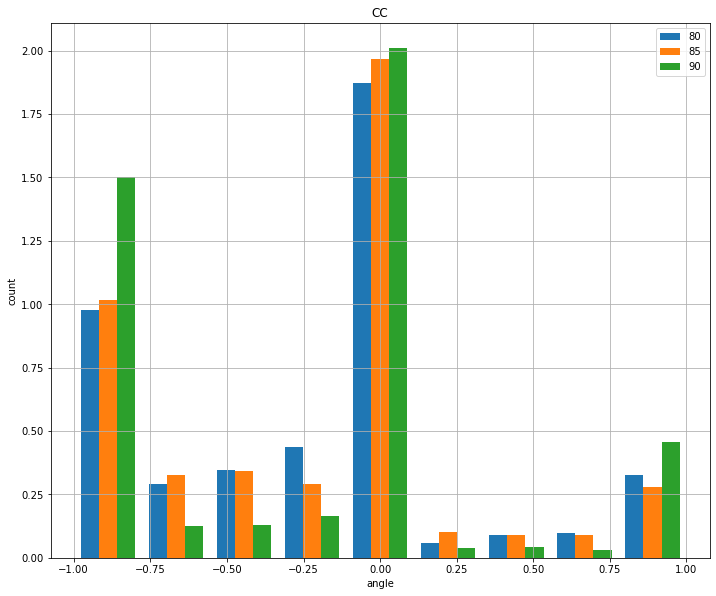

In [102]:
from collections import OrderedDict

direction = 'CC'


def get_angles_for_direction(tub_angles, direction):
    direction_tub_angles = {k: v for k, v in tub_angles.items() if direction in k}
    direction_tub_angles = OrderedDict(sorted(list(direction_tub_angles.items()), key=lambda k: k[0][-2:]))
    direction_angles_by_speed = OrderedDict()
    for k, v in direction_tub_angles.items():
        if direction_angles_by_speed.get(k[-2:]):
            direction_angles_by_speed[k[-2:]].extend(v)
        else:
            direction_angles_by_speed[k[-2:]] = v
    return direction_angles_by_speed

get_angles_for_direction(tub_angles, direction)


def plot_all(name, tub_angles):
    plt.figure()
    hist, bins, _ = plt.hist(tub_angles.values(), bins=9, density=True)
    plt.title(name)
    plt.legend(tub_angles.keys())
    plt.xlabel('angle')
    plt.ylabel('count')
    plt.grid()
    plt.show()
    return hist

hist = plot_all(direction, get_angles_for_direction(tub_angles, direction))

#

Mudel ennustab konservatiivselt? e alaennustab pööramisi. Ei ennusta nii järsku pööramist. Kunagi pole ühtegi labelit suurem väiksem 1 -1 ?

TODO:

1. vead vastavalt ground truthile. See mis teises nb-s alustasin. Vigade histogramm. Mitte ainult keskmine. Kas mingi tub on tuksis?



2. AGA: Miks on mudel mitte võimaline õppima? Kas mudel ennustab ülespoole 1 või allapoole -1 ?


Mudel ju võikski õppida väga palju -1 ja väga palju 1 ja 0 ja mitte üldse vahepealseid, kui on 90 andmete peal treenitud.
Aeglasematel peaks ju vahepealsetel nurkadel olema suurem loss. See oleks loogiline, et 0.9 mudel töötab just 0.9-stel hästi.

NB hoia meeles: Kirjelda ära, et anmded on erinevad.


Early stop patience oli liiga väike - lõpetas treenimise liiga vara. Kui validation set on väike, siis ongi vaja suuremat patience-i.


3. CV fold: jagada sekundiliste juppide kaupa: nt  võtta 100 andmepunkti kaupa, 100 traini, järgmised 10 testi.

Single frame mudeli puhul me ei ootagi 0.8 09 vahel erinevust. Sisend ei erine - 1 frame ainult. Ainult väljundite jaotus erineb. See kui sisend on teistsugune,mõjutab palju rohkem kui oodatavate väljundite jaotus.


Praegu andmeid juurde ei kogu. Olen avastanud ja fixinud bugisid.

4. Early stopping suuremaks.

### LSTM
5x8 pikslit on LSTMil. Spatial resolution on väga kehv. Kas on mõtet pilti kokku suruda ?

NB! Closed loop oli üsna aeglane 5 framega. Proovime closed loop sõitu kahe framega LSTMiga. Konvolutsioon on väga arvutusmahukas. Kui see on probleem siis saab mõne conv kihi ära võtta mudelilt.

5. Treeni LSTM nüüd parandatud koodiga, ilma bugideta, ausa CV-ga, sequence 2.

### 3D

6. proovi korra veel treenida- sequence 3. Selle Ardi tehtud modified mudeliga. TEHTUD! Mis on tulemused? Nende analüüs?


### Andmestiku analüüs
7. Kahe järjestikuse pildi erinevust vaadat EDA-s. Võta pikslite erinevuse keskmine igale frame-le.
Võta Üks tagakurv (kurvis taust liigub kiiremini) - pildid, mis juhtub 0.2 sekundiga. Ja kiirest sõidust. Et näidata, et kiirused on erinevad. Vb ka üksikute piltide erinevused.

ÄRA UNUSTA CROPPIMIST! Ainult see mida mudel näeb.



In [100]:
speed80 = hist[0]
speed85 = hist[1]
speed90 = hist[2]
np.array([speed80, speed85, speed90])/4



array([[0.21961048, 0.08318579, 0.08816167, 0.1099884 , 0.37636608,
        0.02265096, 0.02472678, 0.07530985],
       [0.23211027, 0.09003519, 0.07895594, 0.06979927, 0.41736184,
        0.02342935, 0.02443952, 0.06386861],
       [0.33827025, 0.03161849, 0.03661088, 0.05116014, 0.42228509,
        0.00965196, 0.00725086, 0.10315234]])

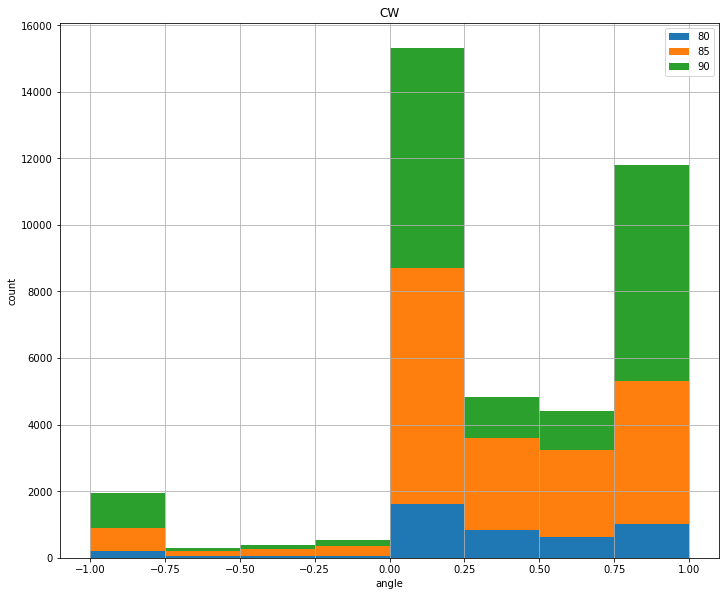

In [68]:
direction = 'CW'
hist = plot_all(direction, get_angles_for_direction(tub_angles, direction))


In [69]:
speed80 = hist[0]
speed85 = hist[1] - speed80
speed90 = hist[2] - speed80 - speed85
np.array([speed80, speed85, speed90])

array([[ 204.,   54.,   50.,   51., 1606.,  830.,  635., 1003.],
       [ 690.,  143.,  210.,  291., 7105., 2773., 2593., 4309.],
       [1042.,   95.,  116.,  198., 6595., 1233., 1170., 6499.]])

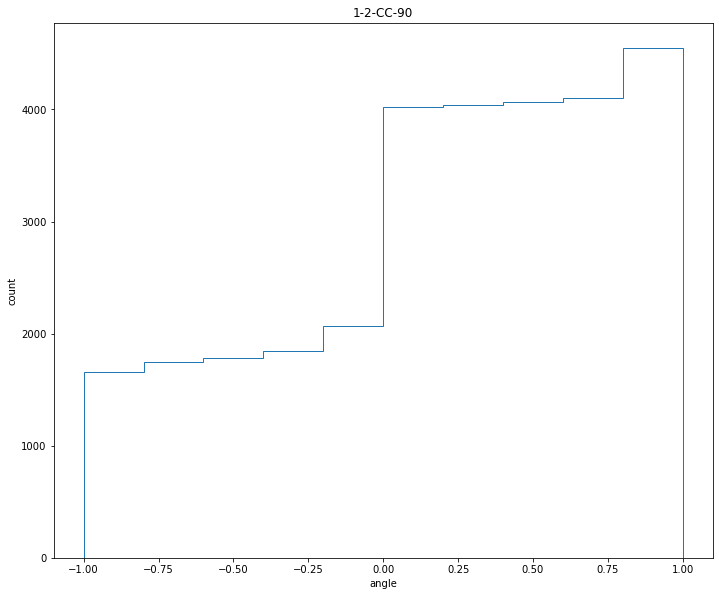

In [33]:
name = tubs[1]
angles = tub_angles[name]
plot_records_hist(angles, name)


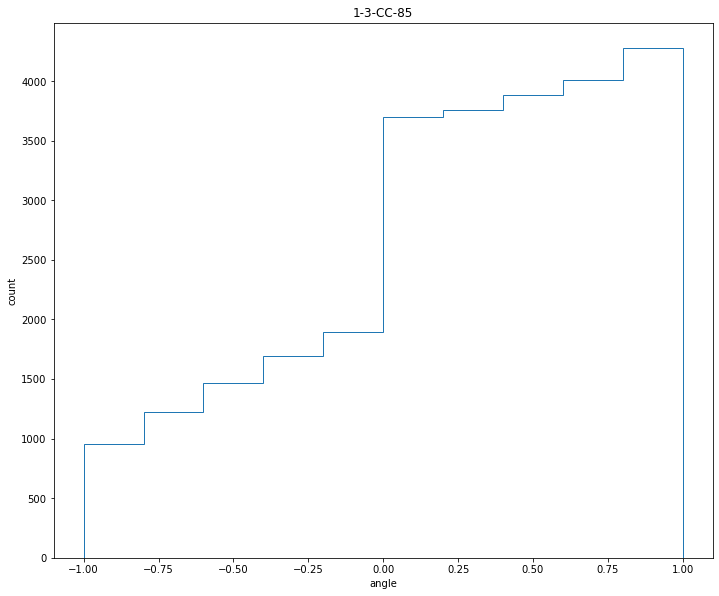

In [34]:
name = tubs[2]
angles = tub_angles[name]
plot_records_hist(angles, name)


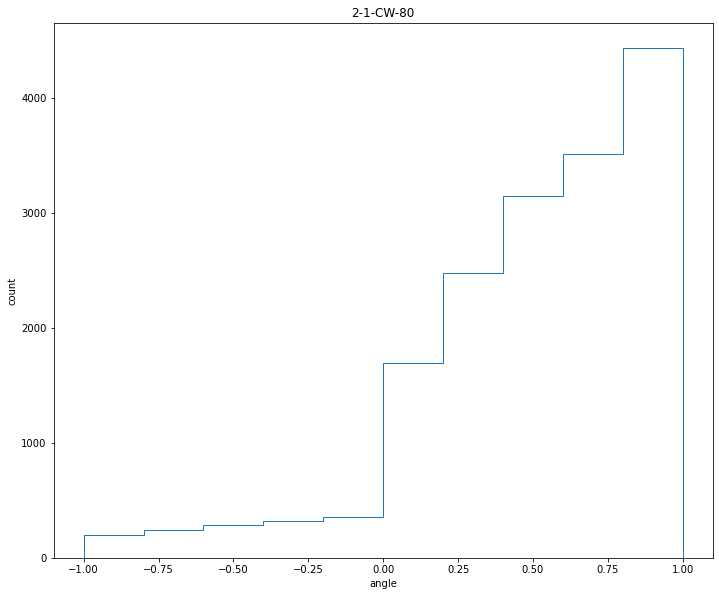

In [35]:
name = tubs[3]
angles = tub_angles[name]
plot_records_hist(angles, name)


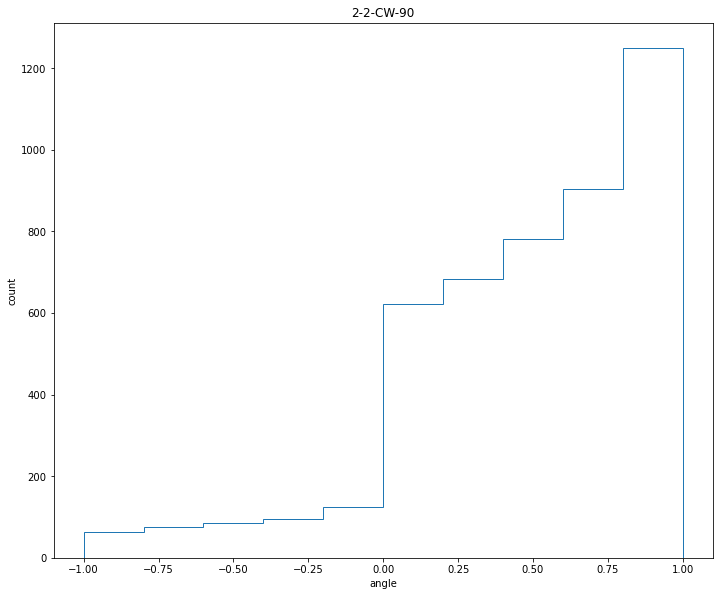

In [36]:
name = tubs[4]
angles = tub_angles[name]
plot_records_hist(angles, name)


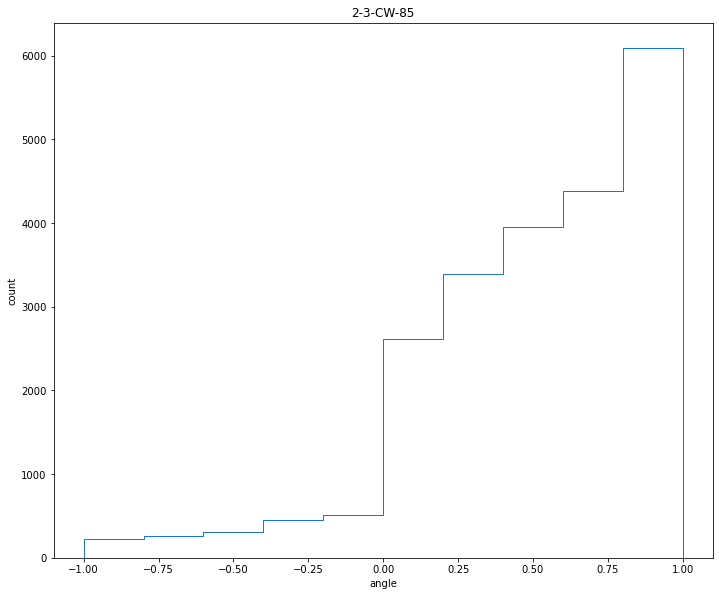

In [37]:
name = tubs[5]
angles = tub_angles[name]
plot_records_hist(angles, name)


In [38]:
lengths, mean = get_lengths_and_mean(images, 9.25, 10.4)
average_lap_frames[name] = mean
lengths, mean

NameError: name 'get_lengths_and_mean' is not defined

In [ ]:
name = tubs[4]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.28, 10)


In [ ]:
lengths, mean = get_lengths_and_mean(images, 9.28, 10)
average_lap_frames[name] = mean
lengths, mean

In [ ]:
name = tubs[5]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.35, 10.0)


In [ ]:
lengths, mean = get_lengths_and_mean(images, 9.35, 10.0)
average_lap_frames[name] = mean
lengths, mean

In [ ]:
name = tubs[6]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.25, 9.8)


In [ ]:
lengths, mean = get_lengths_and_mean(images, 9.35, 10.0)
average_lap_frames[name] = mean
lengths, mean

In [ ]:
name = tubs[7]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.75, 10)


In [ ]:
lengths, mean = get_lengths_and_mean(images, 8.75, 10)
average_lap_frames[name] = mean
lengths, mean

In [ ]:
name = tubs[8]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.75, 9.5)


In [ ]:
lengths, mean = get_lengths_and_mean(images, 8.75, 9.5)
average_lap_frames[name] = mean
lengths, mean

In [ ]:
name = tubs[9]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 8.8, 10)


In [ ]:
lengths, mean = get_lengths_and_mean(images, 8.8, 10)
average_lap_frames[name] = mean
lengths, mean

In [ ]:
name = tubs[10]
images = tub_images[name]
plot_image_diffs(images, name)
plot_lap_frame_counts(images, name, 9.3, 10)

In [ ]:
lengths, mean = get_lengths_and_mean(images, 9.3, 10)
average_lap_frames[name] = mean
lengths, mean

In [ ]:
average_lap_frames

In [ ]:
from collections import defaultdict

speed_averages = defaultdict(list)

for tubname, lap_average in average_lap_frames.items():
    speed_averages[tubname[-2:]].append(lap_average)
speed_averages

In [ ]:
{k:int(np.mean(v)) for k,v in speed_averages.items()}

In [ ]:
speed_image_count = defaultdict(list)

for tubname, images in tub_images.items():
    print(tubname, len(images))
    speed_image_count[tubname[-2:]].append(len(images))
speed_image_count

In [ ]:
{k: sum(v) for k,v in speed_image_count.items()}